Loading the dataset

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [237]:
data = pd.read_csv('iris.csv')

In [238]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [239]:
data.shape

(150, 5)

In [240]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [242]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Exploratory Data Analysis

In [243]:
sns.set()

<Axes: >

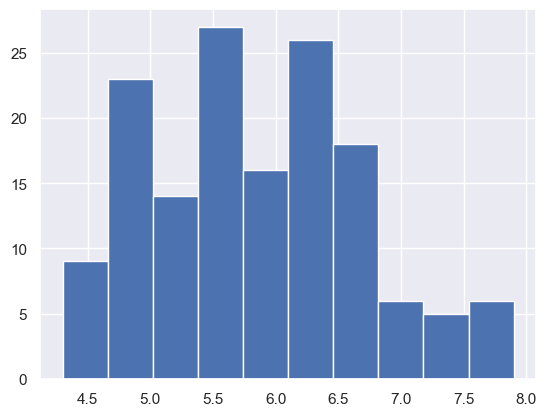

In [244]:
data['sepal_length'].hist()

<Axes: >

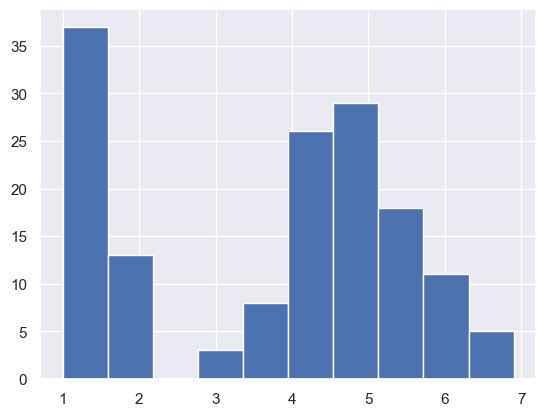

In [245]:
data['petal_length'].hist()

<Axes: >

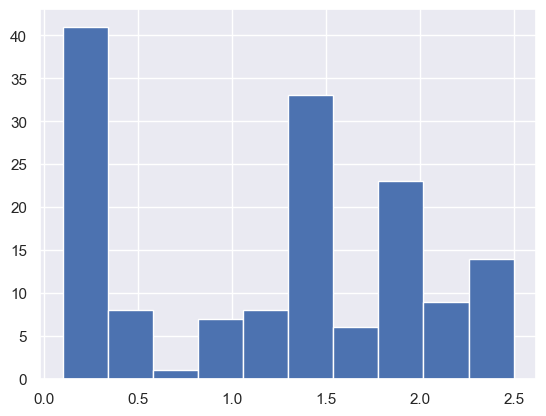

In [246]:
data['petal_width'].hist()

<Axes: >

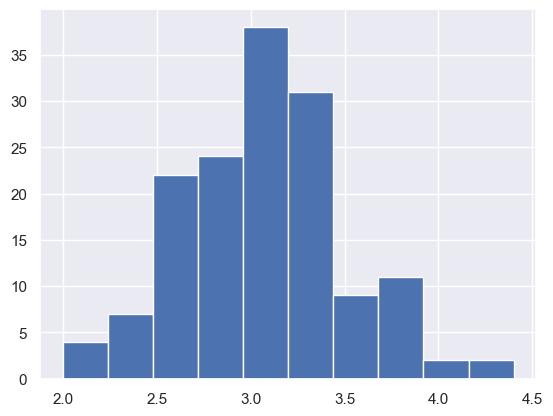

In [247]:
data['sepal_width'].hist()

In [248]:
#scatterplot
colors = ['r', 'g', 'b']
Species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

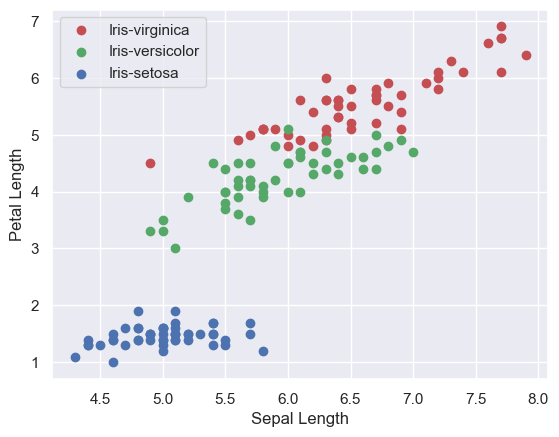

In [249]:
for i in range(3):
    x = data[data['species'] == Species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label = Species[i])

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

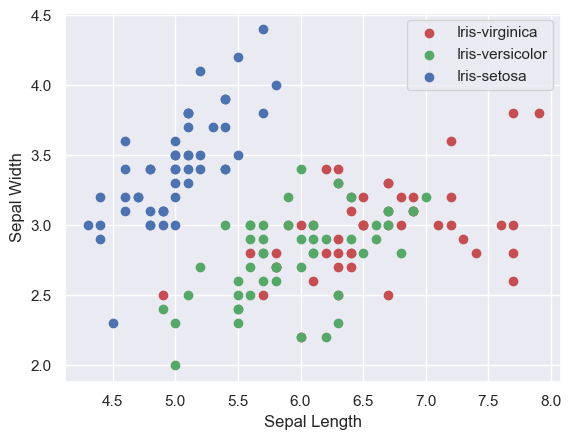

In [250]:
for i in range(3):
    x = data[data['species'] == Species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label=Species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

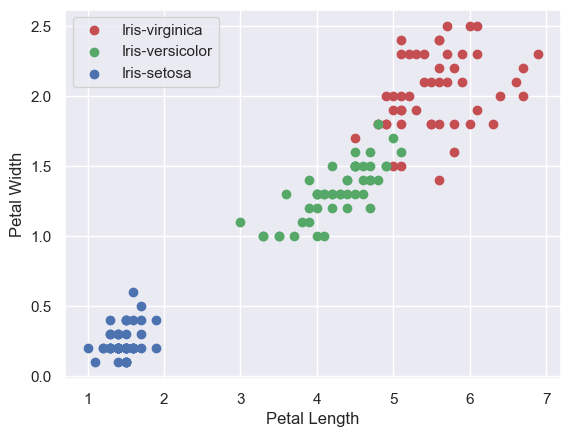

In [251]:
for i in range(3):
    x = data[data['species'] == Species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label=Species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

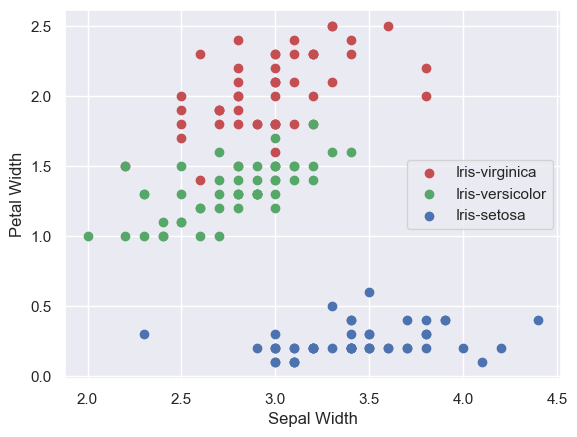

In [252]:
for i in range(3):
    x = data[data['species'] == Species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c = colors[i], label=Species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

ENCODING THE CATEGORICAL COLUMNS

In [253]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [254]:
data.replace({'species':{'Iris-setosa': 0, 'Iris-versicolor' : 1, 'Iris-virginica' : 2}}, inplace=True)

In [255]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


CORRELATION MATRIX

In [256]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

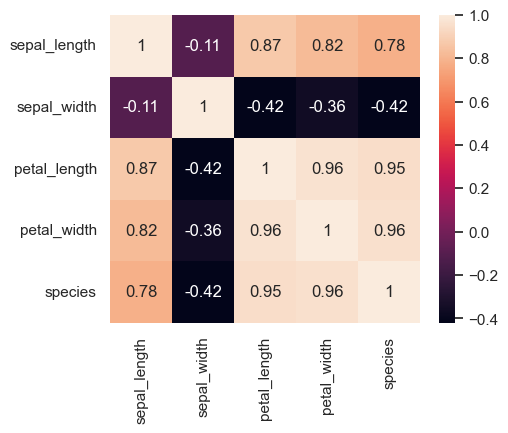

In [257]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax)

MODEL TRAINING

In [258]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = data.drop(columns=['species'])
Y = data['species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [259]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [260]:
# model training
model.fit(x_train, y_train)

c:\Users\gaura\Desktop\DataScience\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [261]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0


In [262]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [263]:

model.fit(x_train, y_train)

KNeighborsClassifier()

In [264]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  96.66666666666667


In [265]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [266]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [267]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  100.0
